# Breast Cancer Detection with Support Vector Machine

# Objective:
Using historical data about patients who were diagnosed with cancer, enable the doctors to confidently differentiate malignant 
cases from benign given the independent attributes.  
Prepare the data and create the model.

# Dataset:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Data File

In [14]:
data = pd.read_csv('bc2.csv')
dataset = pd.DataFrame(data)
dataset.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [15]:
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Preprocessing

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


In [17]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [18]:
dataset = dataset.replace('?', np.nan)
dataset = dataset.apply(lambda x: x.fillna(x.median()),axis=0)

# Converting the feature column 'Bare Nuclei' from object/string type to float
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].astype('float64')  

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [20]:
dataset.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

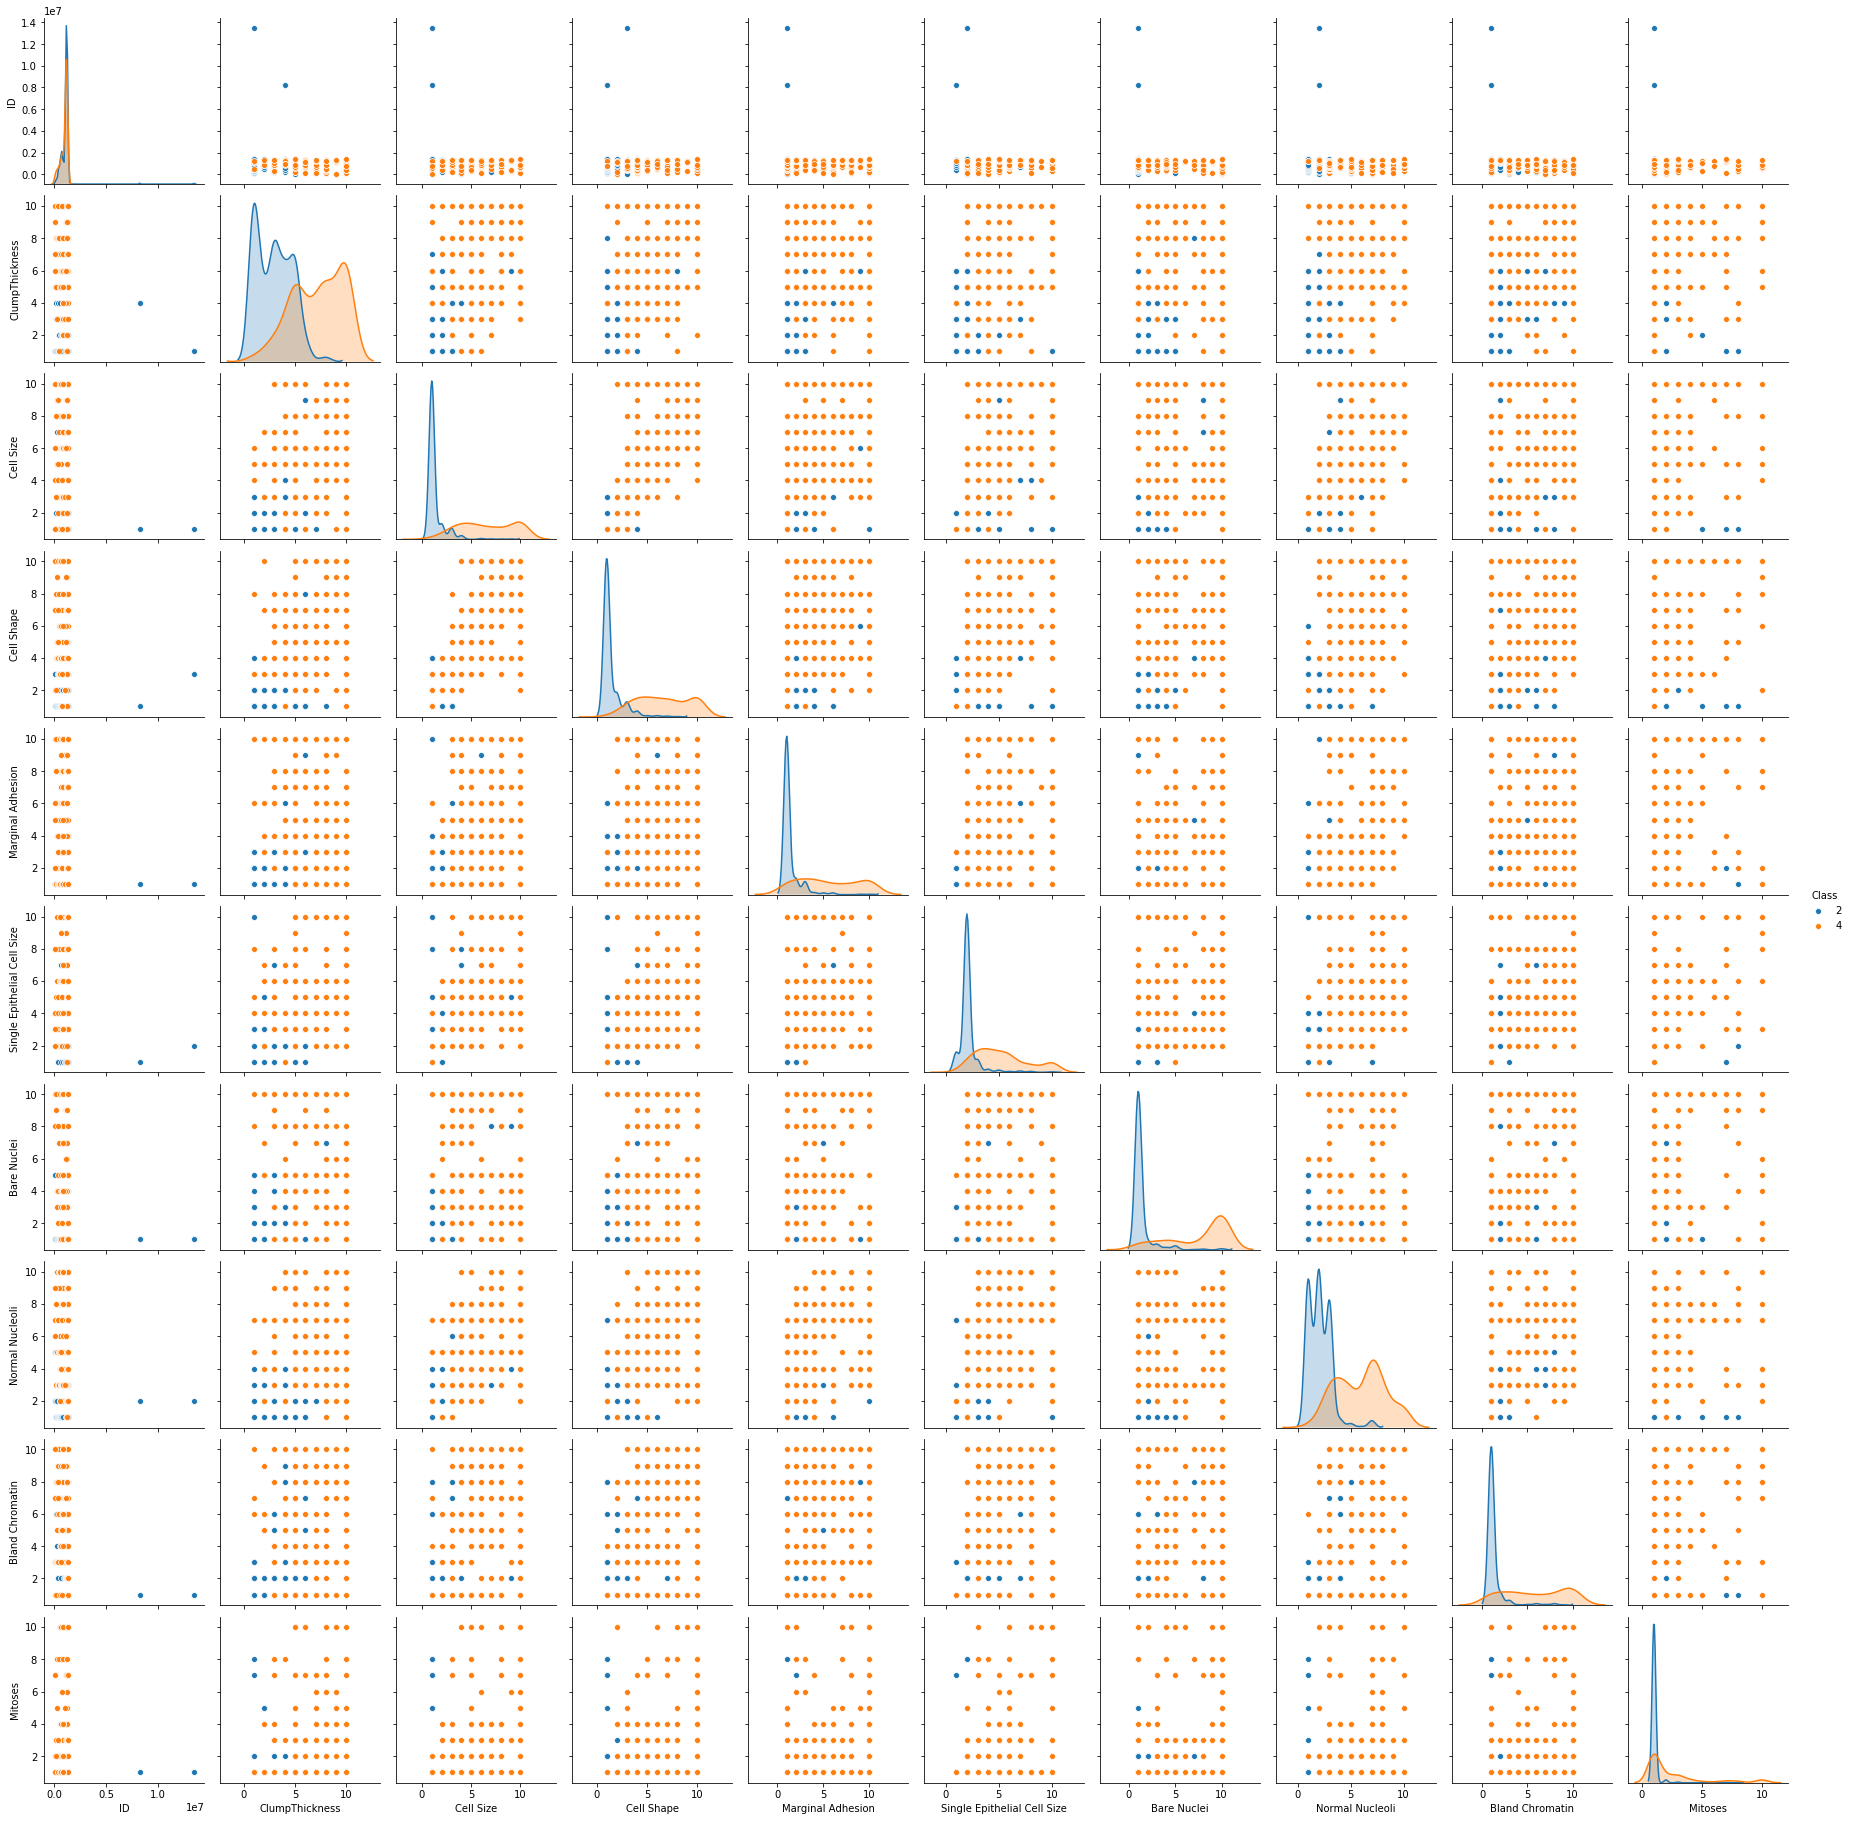

In [21]:
sns.pairplot(dataset, diag_kind = "kde", hue = "Class")

## Split Data into Training and Test Set

In [25]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = dataset["Class"]
features = dataset.drop(["ID","Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 10)

## Build the Model - Train, Predict and Evaluate

Use linear kernel.

In [26]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= 0.1, kernel='linear', gamma= 1.0)
svc_model.fit(X_train, y_train)
print('\n Training completed....\n')

prediction = svc_model.predict(X_test)
print(prediction)


 Training completed....

[4 2 2 2 2 4 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 4 4 2 2 4 4 4 2 2 2 2 4 4 2 2 4
 2 2 4 2 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2
 2 4 4 4 2 4 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2
 2 4 2 4 4 2 2 4 2 2 2 2 4 2 2 2 4 4 4 4 2 2 2 4 2 4 2 2 2]


In [27]:
# check the accuracy on the training set
print('\n Training score: ')
print(svc_model.score(X_train, y_train))

print('\n Testing score: ')
print(svc_model.score(X_test, y_test))


 Training score: 
0.9749552772808586

 Testing score: 
0.9642857142857143


In [28]:
print("Confusion Matrix:\n")
print(confusion_matrix(prediction,y_test))

Confusion Matrix:

[[95  2]
 [ 3 40]]


## Build the Model - Train and Evaluate

Use rbf kernel.

In [29]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
print('\n Training completed with RBF kernel....\n')


 Training completed with RBF kernel....



In [30]:
print('\n Training score: ')
print(svc_model.score(X_train, y_train))

print('\n Testing score: ')
print(svc_model.score(X_test, y_test))


 Training score: 
0.9785330948121646

 Testing score: 
0.9642857142857143


## Build the Model - Train and Evaluate

Use ploynomial kernel.

In [31]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)
print('\n Training completed with polynomial kernel......')

prediction = svc_model.predict(X_test)

print('\n Training score: ')
print(svc_model.score(X_train, y_train))

print('\n Testing score: ')
print(svc_model.score(X_test, y_test))


 Training completed with polynomial kernel......

 Training score: 
0.9785330948121646

 Testing score: 
0.9571428571428572


## Build the Model - Train and Evaluate

Use sigmoid kernel.

In [32]:
svc_model = SVC(kernel='sigmoid')

print('\n Training completed with sigmoid kernel.... ')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print('\n Training score: ')
print(svc_model.score(X_train, y_train))

print('\n Testing score: ')
print(svc_model.score(X_test, y_test))


 Training completed with sigmoid kernel.... 

 Training score: 
0.3953488372093023

 Testing score: 
0.44285714285714284
